# import packages
Let's start by importing the following packages!
* requests
* BeautifulSoup
* seaborn
* matplotlib
* pandas
* re

In [1]:
# import package
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

# crawler THSR information
Let's start to crawl the imformation of each station of THSR!
* Target web: [THSR Homepage](https://www.thsrc.com.tw)  
* Choose each station:
    1. Homepage -> Travel Information -> Stations
    2. choose different stations by changing url
* Task:
    1. crawler the name, address, operation hours and ticketing hours of each station
    2. organize into a DataFrame

In [2]:
# setting each station name and their url
url=['https://www.thsrc.com.tw/ArticleContent/2f940836-cedc-41ef-8e28-c2336ac8fe68',
    'https://www.thsrc.com.tw/ArticleContent/977abb69-413a-4ccf-a109-0272c24fd490',
    'https://www.thsrc.com.tw/ArticleContent/e6e26e66-7dc1-458f-b2f3-71ce65fdc95f',
    'https://www.thsrc.com.tw/ArticleContent/fbd828d8-b1da-4b06-a3bd-680cdca4d2cd',
    'https://www.thsrc.com.tw/ArticleContent/a7a04c89-900b-4798-95a3-c01c455622f4',
    'https://www.thsrc.com.tw/ArticleContent/e8fc2123-2aaf-46ff-ad79-51d4002a1ef3',
    'https://www.thsrc.com.tw/ArticleContent/3301e395-46b8-47aa-aa37-139e15708779',
    'https://www.thsrc.com.tw/ArticleContent/38b8c40b-aef0-4d66-b257-da96ec51620e',
    'https://www.thsrc.com.tw/ArticleContent/5f4c7bb0-c676-4e39-8d3c-f12fc188ee5f',
    'https://www.thsrc.com.tw/ArticleContent/60831846-f0e4-47f6-9b5b-46323ebdcef7',
    'https://www.thsrc.com.tw/ArticleContent/9c5ac6ca-ec89-48f8-aab0-41b738cb1814',
    'https://www.thsrc.com.tw/ArticleContent/f2519629-5973-4d08-913b-479cce78a356']

thsrc_dict={'station':[],'address':[],'operation_hours':[],'ticketing_hours':[]}
station_names=[]
for i in range(len(url)):
    url_=url[i]
    response=requests.get(url_)
    soup = BeautifulSoup(response.text, 'html.parser')

    station=soup.find('table',class_='table')
    station_name=soup.find_all('div',class_='nav')
    station_=station.find(class_='google-map-link orange')
    station__=station.find_all(class_='gray')
   
    station_names.append(station_name[0].text.split())

    thsrc_dict['address'].append(station_.text)  # crawler the address of each station
    thsrc_dict['operation_hours'].append(station__[0].text.split('：')[1])
    thsrc_dict['ticketing_hours'].append(station__[1].text.split('：')[1])  # crawler the operation hours and ticketing hours of each station
for j in station_names[0]:
        thsrc_dict['station'].append(j)    
pd.DataFrame(thsrc_dict)   # create a DataFrame

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


In [5]:
# crawler the address of each station

In [ ]:
# crawler the operation hours and ticketing hours of each station

In [20]:
# create a DataFrame

,station,address,operation_hours,ticketing_hours
0,南港,台北市南港區南港路一段313號,05:50 ~ 24:00,05:50 ~ 末班車發車時間
1,台北,台北市北平西路3號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
2,板橋,新北市板橋區縣民大道二段7號,06:00 ~ 24:00,06:00 ~ 末班車發車時間
3,桃園,桃園市中壢區高鐵北路一段6號,06:20 ~ 23:45,06:20 ~ 末班車發車時間
4,新竹,新竹縣竹北市高鐵七路6號,06:15 ~ 23:45,06:15 ~ 末班車發車時間
5,苗栗,苗栗縣後龍鎮高鐵三路268號,06:05 ~ 23:45,06:05 ~ 末班車發車時間
6,台中,台中市烏日區站區二路8號,05:40 ~ 24:00,05:40 ~ 末班車發車時間
7,彰化,彰化縣田中鎮站區路二段99號,06:20 ~ 24:00,06:20~末班車發車時間
8,雲林,雲林縣虎尾鎮站前東路301號,06:15 ~ 23:45,06:15~末班車發車時間
9,嘉義,嘉義縣太保市高鐵西路168號,06:00 ~ 23:45,06:00~末班車發車時間


# Crawler GDP and CPI
Let's start to crawl GDP and CPI!
* Target web: 
    1. [Wiki GDP](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal))  
    2. [Wiki CPI](https://en.wikipedia.org/wiki/Corruption_Perceptions_Index)
* Task:
    1. crawler GDP table (top 50: United States ~ New Zealand)
    2. organize into a DataFrame (columns: Country, Region, IMF_Estimate, IMF_Year, United_Nations_Estimate, United_Nations_Year, World_Bank_Estimate, World_Bank_Year)
    3. crawler CPI table which contains country and 2020 CPI (top 100: Denmark ~ Suriname)
    4. organize into a DataFrame (columns: Country, CPI_2020)
    5. merge GDP(DataFrame) and CPI(DataFrame), based on Country of GDP
    6. plot and text the names of GDP top 10 countrys

In [32]:
# crawler GDP
url='https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(nominal)'
response=requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

In [33]:
# create GDP DataFrame
# GDP_dict={'Country':[],'Redion':[],'IMF_Estimate':[],'IMF_Year':[],'United_Nations_Estimate':[],'United_Nations_Year':[],
#          'World_Bank_Estimate':[],'World_Bank_Year':[]}
# keys = list(GDP_dict.keys())
# data=soup.find('table',class_='wikitable')
# datas=data.find_all('td')

# datass=[]
# for i in range(len(datas)):
#     datass.append(datas[i].text.strip())
#     if i % 8 < 4:
#         # save numbers, decimal points, and -
#         GDP_dict[keys[i % 4]].extend(datass[i])
# #   #  i.text.split()
  
# print(datass)
GDP=soup.find("caption",string=re.compile("GDP")).find_parent("table").find_all('tr')
GDP_dict={}
column=[]
th=GDP[0].find_all("th",rowspan='2')
for i in th:
    GDP_dict[i.text[:-1]]=[]

th=GDP[0].find_all("th",colspan="2")
for i in th:
    column.append(i.find('a').text)
th=GDP[1].find_all("th")
index=-1
for i in range(0,len(th)):
    if i%2==0:
        index+=1
    if th[i].text[-1]=='\n':
        temp=column[index]+'_'+th[i].text[:-1]
    else:
        temp=column[index]+'_'+th[i].text
    GDP_dict[temp]=[]
column=list(GDP_dict.keys())
for i in range(2,64):
    td=GDP[i].find_all("td")
    j=0
    column_v1=column.copy()
    while j<len(td):
        try:
            colspan=int(td[j]['colspan'])
            for index in range(0,colspan):
                GDP_dict[column_v1[0]].append('N/A')
                column_v1.remove(column_v1[0])
        except:
            if j==0:
                GDP_dict[column_v1[0]].append(td[j].find('a').text[:-2])
            else:
                if "Year" in column_v1[0]:
                    s=td[j].text

                    if '\n' in s:
                        GDP_dict[column_v1[0]].append(s[:-1])
                    elif ']' in s:
                        GDP_dict[column_v1[0]].append(s[-4:])
                    else:
                        GDP_dict[column_v1[0]].append(s)
                else:
                    if "Estimate" in column_v1[0]:
                        temp=td[j].text.split(',')
                        s=''
                        for string in temp:
                            s=s+string
                        s=int(s)
                        GDP_dict[column_v1[0]].append(s)
                    else:
                        GDP_dict[column_v1[0]].append(td[j].text)
            column_v1.remove(column_v1[0])
        j+=1
GDP_df= pd.DataFrame(GDP_dict)
GDP_df

,Country/Territory,Region,IMF_Estimate,IMF_Year,United Nations_Estimate,United Nations_Year,World Bank_Estimate,World Bank_Year
0,United Stat,Americas,22675271,2021,21433226,2019,20936600,2020
1,Chi,Asia,16642318,2021,14342933,2019,14722731,2020
2,Jap,Asia,5378136,2021,5082465,2019,4975415,2020
3,Germa,Europe,4319286,2021,3861123,2019,3806060,2020
4,United Kingd,Europe,3124650,2021,2826441,2019,2707744,2020
...,...,...,...,...,...,...,...,...
57,Alger,Africa,151459,2021,171157,2019,145164,2020
58,Kuwa,Asia,126930,2021,134623,2019,136197,2019
59,Moroc,Africa,124003,2021,119700,2019,112871,2020
60,Slovak,Europe,117664,2021,105079,2019,104574,2020


In [34]:
# crawler CPI
url='https://en.wikipedia.org/wiki/Corruption_Perceptions_Index'
html=requests.get(url)
soup= BeautifulSoup(html.text, "html.parser")


In [35]:
#CPI DataFrame
CPI_dict={"Country":[],"CPI_2020":[]}
CPI=soup.find(id='cite_ref-16').find_parent('table').find_all('tr')
for i in range(2,len(CPI)):
    td=CPI[i].find_all('td')
    a=td[1].find('a').text
    CPI_dict['Country'].append(a)
    a=td[2].text
    CPI_dict['CPI_2020'].append(a)
CPI_df=pd.DataFrame(CPI_dict)
CPI_df


,Country,CPI_2020
0,Denmark,88
1,New Zealand,88
2,Finland,85
3,Singapore,85
4,Sweden,85
...,...,...
175,Venezuela,15
176,Yemen,15
177,Syria,14
178,Somalia,12


In [36]:
# merge GDP and CPI DataFrame
GDP_dict['Country']=GDP_dict["Country/Territory"] #把GDP_dict內的名稱從Country/Territory改成Country
del GDP_dict["Country/Territory"]
GDP_df=pd.DataFrame(GDP_dict)
df=pd.merge(GDP_df,CPI_df,on='Country') #再用Country這項去把兩個DataFrame合併

df #但我不知道為什麼我只出現了一項

,Region,IMF_Estimate,IMF_Year,United Nations_Estimate,United Nations_Year,World Bank_Estimate,World Bank_Year,Country,CPI_2020
0,Africa,514049,2021,474516,2019,432294,2020,Niger,32


KeyError: 1

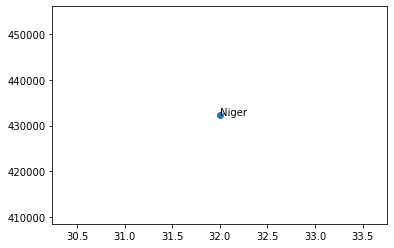

In [29]:
# plot
#因為上面只出現一項所以這裡好像是錯的
plt.figure()
Country=[]
for i in range(0,10):
    sub=df_.loc[i]
    World_Bank_Estimate=sub['World Bank_Estimate']
    CPI_2020=int(sub['CPI_2020'])
    plt.plot(CPI_2020,World_Bank_Estimate,'o')
    plt.text(CPI_2020,World_Bank_Estimate,sub['Country'])
    Country.append(sub['Country'])
plt.ylabel("World Bank_Estimate")
plt.xlabel("CPI_2020")
plt.legend(Country[:-5],fontsize=8,loc="center right")